<a href="https://colab.research.google.com/github/Uchiha67/Prediction-of-HTC-using-nanofluids/blob/main/Ann_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import time
import tensorflow as tf
from scipy.io import FortranFile
import random
import pandas as pd
# Import PyTorch libraries
import torch
from torch import nn

# Import visualization library
import matplotlib.pyplot as plt
import seaborn as sns
# Verify PyTorch version
torch.__version__


'2.0.1+cu118'

In [ ]:
# Check to see if we have a GPU to use for training
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('A {} device was detected.'.format(device))

# Print the name of the cuda device, if detected
if device=='cuda':
    print (torch.cuda.get_device_name(device=device))

A cpu device was detected.


In [ ]:
df = pd.read_excel('FINAL SHEET.xlsx', sheet_name='Database')

# Explore the first 10 rows of the dataset
df.head(10)

,Base Fluid,Nano Particle,Mass Fraction,Reynold No.,Density of nanofluid (kg/m3),Specific heat-nano fluid ( J/kg K),Thermal conductivity-nanofluid(W/mK),Dynamic viscocity- nanofluid (Kg/m3),Heat Transfer Coefficient ( W/m2K),Source
0,EG/water (60:40),Aluminium oxide(AL2O3),0.02,8783.31970,1125.361821,51.749852,0.407062,3.305239,5157.85548,Development of new correlations for convective...
1,EG/water (60:40),Aluminium oxide(AL2O3),0.02,9068.43394,1126.321689,51.699119,0.405898,3.469004,5386.48670,Development of new correlations for convective...
2,EG/water (60:40),Aluminium oxide(AL2O3),0.02,9502.58516,1127.473481,51.638214,0.404448,3.682849,5694.79243,Development of new correlations for convective...
3,EG/water (60:40),Aluminium oxide(AL2O3),0.02,9858.97795,1128.604730,51.578358,0.402965,3.913629,6041.20337,Development of new correlations for convective...
4,EG/water (60:40),Aluminium oxide(AL2O3),0.02,10001.53506,1129.272011,51.543029,0.402062,4.060538,6269.83459,Development of new correlations for convective...
5,EG/water (60:40),Aluminium oxide(AL2O3),0.02,10435.68628,1129.893939,51.510085,0.401199,4.205375,6501.92992,Development of new correlations for convective...
6,EG/water (60:40),Aluminium oxide(AL2O3),0.02,10792.07907,1130.458271,51.480176,0.400399,4.343913,6730.56113,Development of new correlations for convective...
7,EG/water (60:40),Aluminium oxide(AL2O3),0.02,11077.19331,1131.152680,51.443351,0.399391,4.524415,7038.86687,Development of new correlations for convective...
8,EG/water (60:40),Aluminium oxide(AL2O3),0.02,11368.78741,1131.547908,51.422380,0.398806,4.632445,7229.39288,Development of new correlations for convective...
9,EG/water (60:40),Aluminium oxide(AL2O3),0.02,11582.62308,1131.926505,51.402282,0.398236,4.739760,7423.38301,Development of new correlations for convective...


**DATA** **VISUALIZATION**


In [ ]:
cormat = df.corr()
round(cormat,2)

<ipython-input-4-c450962e4570>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cormat = df.corr()


,Mass Fraction,Reynold No.,Density of nanofluid (kg/m3),Specific heat-nano fluid ( J/kg K),Thermal conductivity-nanofluid(W/mK),Dynamic viscocity- nanofluid (Kg/m3),Heat Transfer Coefficient ( W/m2K)
Mass Fraction,1.00,-0.36,0.86,-0.18,0.81,-0.37,-0.47
Reynold No.,-0.36,1.00,-0.28,0.34,-0.20,-0.05,0.94
Density of nanofluid (kg/m3),0.86,-0.28,1.00,-0.21,0.89,-0.27,-0.36
Specific heat-nano fluid ( J/kg K),-0.18,0.34,-0.21,1.00,-0.04,-0.70,0.37
Thermal conductivity-nanofluid(W/mK),0.81,-0.20,0.89,-0.04,1.00,-0.35,-0.28
Dynamic viscocity- nanofluid (Kg/m3),-0.37,-0.05,-0.27,-0.70,-0.35,1.00,-0.02
Heat Transfer Coefficient ( W/m2K),-0.47,0.94,-0.36,0.37,-0.28,-0.02,1.00


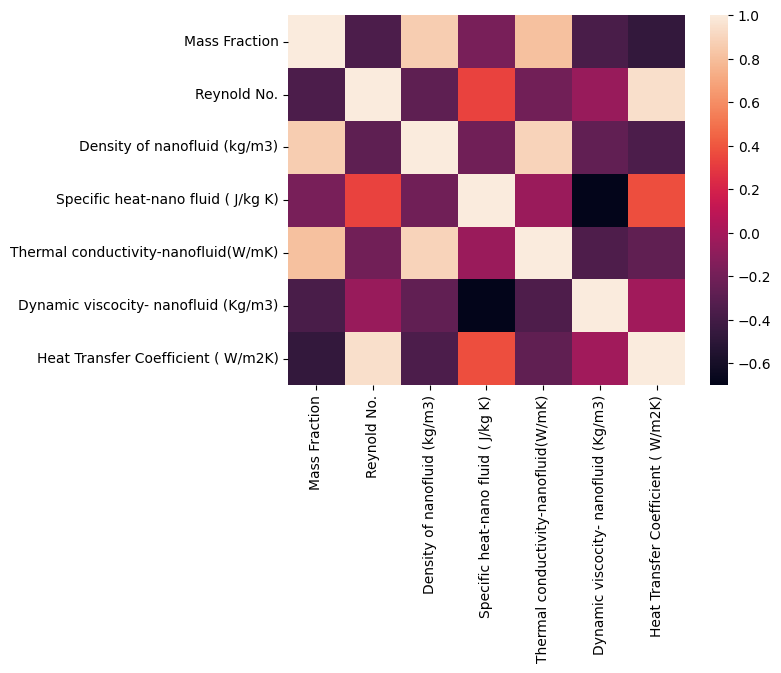

In [ ]:
sns.heatmap(cormat);

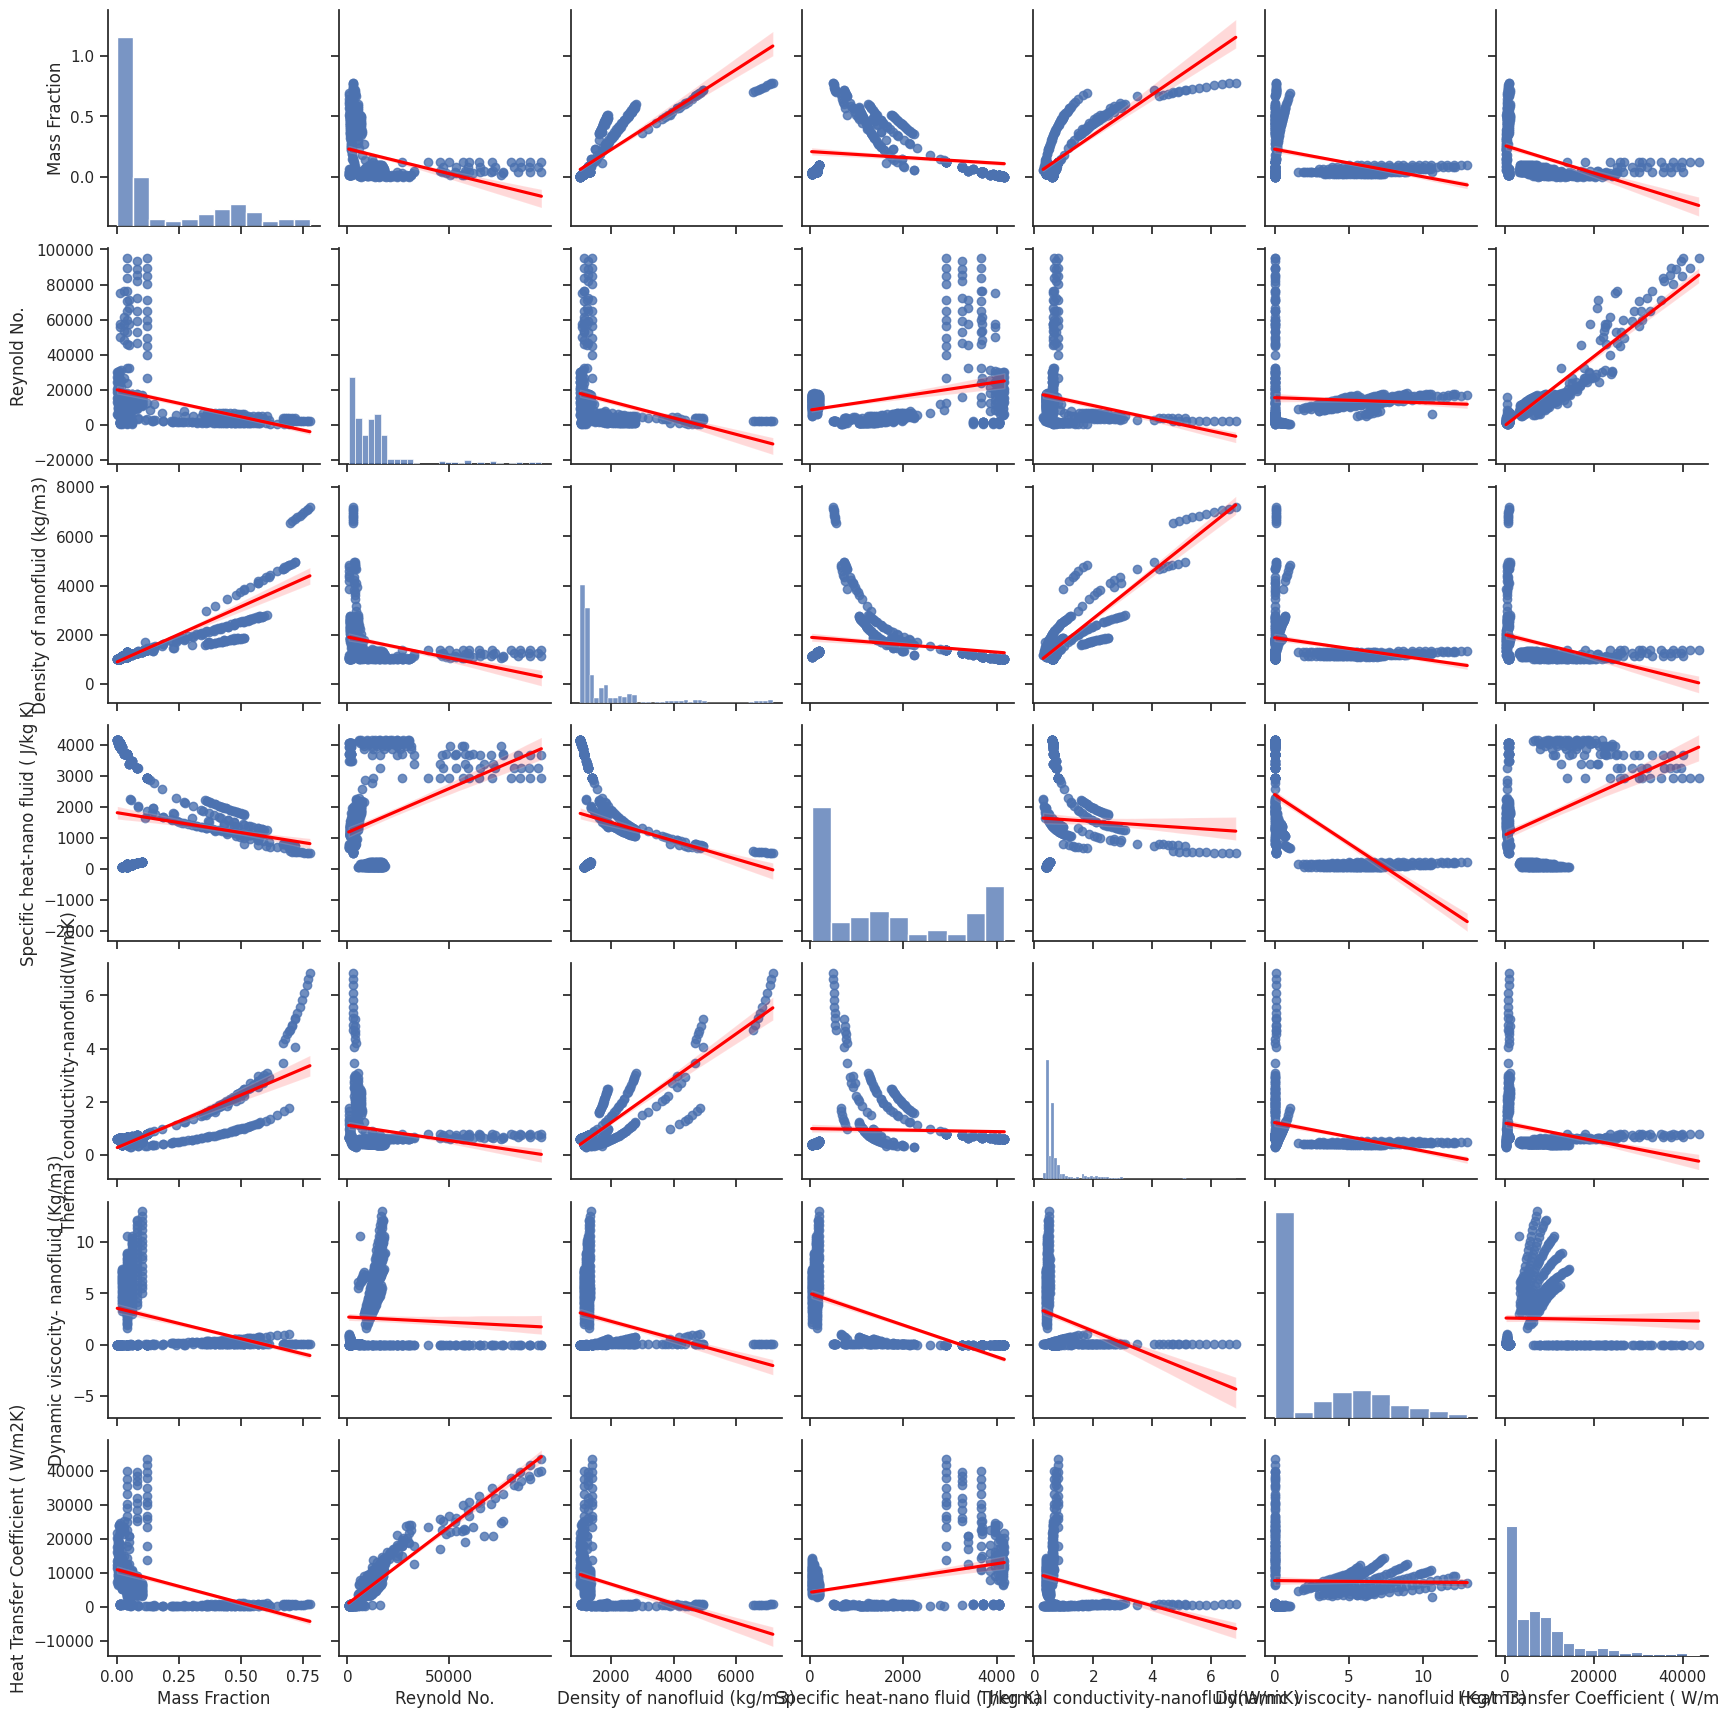

In [ ]:

sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df, kind="reg", plot_kws={'line_kws':{'color':'red'}})
plt.show()
 

In [ ]:
data=pd.get_dummies(df, columns=["Base Fluid", "Nano Particle"], prefix=["Base_fluid_en", "Nano_particle_en"])
data=data.drop('Source',axis=1)

In [ ]:
data.head()

,Mass Fraction,Reynold No.,Density of nanofluid (kg/m3),Specific heat-nano fluid ( J/kg K),Thermal conductivity-nanofluid(W/mK),Dynamic viscocity- nanofluid (Kg/m3),Heat Transfer Coefficient ( W/m2K),Base_fluid_en_EG/water (60:40),Base_fluid_en_Ethylene Glycol,Base_fluid_en_Water,Nano_particle_en_(SIO2),Nano_particle_en_Aluminium,Nano_particle_en_Aluminium Oxide,Nano_particle_en_Aluminium oxide(AL2O3),Nano_particle_en_Copper,Nano_particle_en_Copper Oxide,Nano_particle_en_Titanium Dioxide,Nano_particle_en_Zirconium Dioxide
0,0.02,8783.31970,1125.361821,51.749852,0.407062,3.305239,5157.85548,1,0,0,0,0,0,1,0,0,0,0
1,0.02,9068.43394,1126.321689,51.699119,0.405898,3.469004,5386.48670,1,0,0,0,0,0,1,0,0,0,0
2,0.02,9502.58516,1127.473481,51.638214,0.404448,3.682849,5694.79243,1,0,0,0,0,0,1,0,0,0,0
3,0.02,9858.97795,1128.604730,51.578358,0.402965,3.913629,6041.20337,1,0,0,0,0,0,1,0,0,0,0
4,0.02,10001.53506,1129.272011,51.543029,0.402062,4.060538,6269.83459,1,0,0,0,0,0,1,0,0,0,0


In [ ]:
# Check the size/shape of our dataset
data.shape

(472, 18)

In [ ]:
5 # Importing the library
import sklearn
from sklearn.preprocessing import StandardScaler
# define standard scaler
scaler = StandardScaler()

# transform data
scaled_data = scaler.fit_transform(data)
scaled_data=pd.DataFrame(scaled_data,index=data.index,columns=data.columns)

In [ ]:
scaled_data.shape

(472, 18)

In [ ]:
scaled_data.head(10)

,Mass Fraction,Reynold No.,Density of nanofluid (kg/m3),Specific heat-nano fluid ( J/kg K),Thermal conductivity-nanofluid(W/mK),Dynamic viscocity- nanofluid (Kg/m3),Heat Transfer Coefficient ( W/m2K),Base_fluid_en_EG/water (60:40),Base_fluid_en_Ethylene Glycol,Base_fluid_en_Water,Nano_particle_en_(SIO2),Nano_particle_en_Aluminium,Nano_particle_en_Aluminium Oxide,Nano_particle_en_Aluminium oxide(AL2O3),Nano_particle_en_Copper,Nano_particle_en_Copper Oxide,Nano_particle_en_Titanium Dioxide,Nano_particle_en_Zirconium Dioxide
0,-0.708876,-0.333448,-0.488472,-1.000864,-0.524285,0.225596,-0.286052,1.240014,-0.403189,-0.934353,-0.241446,-0.30429,-0.53161,1.630618,-0.147122,-0.557773,-0.283004,-0.187317
1,-0.708876,-0.317786,-0.487599,-1.000897,-0.525417,0.273784,-0.259957,1.240014,-0.403189,-0.934353,-0.241446,-0.30429,-0.53161,1.630618,-0.147122,-0.557773,-0.283004,-0.187317
2,-0.708876,-0.293936,-0.486552,-1.000936,-0.526827,0.336708,-0.224767,1.240014,-0.403189,-0.934353,-0.241446,-0.30429,-0.53161,1.630618,-0.147122,-0.557773,-0.283004,-0.187317
3,-0.708876,-0.274358,-0.485524,-1.000975,-0.528268,0.404615,-0.185228,1.240014,-0.403189,-0.934353,-0.241446,-0.30429,-0.53161,1.630618,-0.147122,-0.557773,-0.283004,-0.187317
4,-0.708876,-0.266527,-0.484917,-1.000998,-0.529147,0.447843,-0.159132,1.240014,-0.403189,-0.934353,-0.241446,-0.30429,-0.53161,1.630618,-0.147122,-0.557773,-0.283004,-0.187317
5,-0.708876,-0.242677,-0.484352,-1.001020,-0.529985,0.490462,-0.132641,1.240014,-0.403189,-0.934353,-0.241446,-0.30429,-0.53161,1.630618,-0.147122,-0.557773,-0.283004,-0.187317
6,-0.708876,-0.223099,-0.483839,-1.001039,-0.530763,0.531227,-0.106545,1.240014,-0.403189,-0.934353,-0.241446,-0.30429,-0.53161,1.630618,-0.147122,-0.557773,-0.283004,-0.187317
7,-0.708876,-0.207436,-0.483207,-1.001063,-0.531743,0.584340,-0.071356,1.240014,-0.403189,-0.934353,-0.241446,-0.30429,-0.53161,1.630618,-0.147122,-0.557773,-0.283004,-0.187317
8,-0.708876,-0.191418,-0.482848,-1.001077,-0.532313,0.616127,-0.049609,1.240014,-0.403189,-0.934353,-0.241446,-0.30429,-0.53161,1.630618,-0.147122,-0.557773,-0.283004,-0.187317
9,-0.708876,-0.179671,-0.482504,-1.001090,-0.532866,0.647705,-0.027468,1.240014,-0.403189,-0.934353,-0.241446,-0.30429,-0.53161,1.630618,-0.147122,-0.557773,-0.283004,-0.187317


**DATA SET SPLIT**

In [ ]:
 # First dataframe with 80% of the rows
train= scaled_data.sample(frac=0.8, random_state=1) 
 # Second dataframe with the remaining rows
test = scaled_data.drop(train.index)

In [ ]:
train.shape

(378, 18)

In [ ]:
test.shape

(94, 18)

In [ ]:
import pandas as pd
import numpy as np
import math
import itertools
import matplotlib.pyplot as plt

from sklearn import model_selection, metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 
from scipy import stats


from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, r2_score, f1_score,mean_squared_error

from sklearn.svm import SVR

from numpy.random import seed
seed(1)

In [ ]:
def complete_model(trainX, trainy, testX, testy, model):
    model.fit(trainX, trainy)
    y_pred = model.predict(testX)
    return calculation(testy, y_pred)

  



In [ ]:
def calculation(y_test, y_pred):  
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mse)
    r2=metrics.r2_score(y_test,y_pred)
    pcc=stats.pearsonr(y_test,y_pred)
    return [mse, rmse, r2, pcc[0],pcc[1]]

In [ ]:
def print_output(model_name, val, output_val):
    print('\033[1mOptimized {} model {} performance: \033[0m'.format(model_name, val))
    print("MSE:         {0:.3f}".format(output_val[0]))
    print("RMSE: {0:.3f}".format(output_val[1]))
    print("R2: {0:.3f}".format(output_val[2]))
    print("PCC:    {0:.3f}".format(output_val[3]))
    print("p-value:    {0:.3f}".format(output_val[4]))

In [ ]:
## Create training and test file
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, r2_score, f1_score,mean_squared_error

from sklearn.neural_network import MLPRegressor


from numpy.random import seed
seed(1)

X = train.iloc[:,1:].values
y = train.loc[:,'Heat Transfer Coefficient ( W/m2K)'].values
X[:] = np.nan_to_num(X)
y[:] = np.nan_to_num(y)


In [ ]:

X.shape

(378, 17)

In [ ]:
y.shape

(378,)

In [ ]:

X_val = test.iloc[:,1:].values
y_val = test.loc[:,'Heat Transfer Coefficient ( W/m2K)'].values

X_val[:] = np.nan_to_num(X_val)
y_val[:] = np.nan_to_num(y_val)

In [ ]:
X_val.shape

(94, 17)

In [ ]:
column_names =  ['Range_val', 'Model_info','MAE', 'RMSE','R2', 'PCC','p-val']
output  = pd.DataFrame(columns = column_names)

activations = ['tanh', 'relu']
solvers = ['sgd', 'adam']
learning_rates = ['constant', 'invscaling', 'adaptive']


paras = [l for l in itertools.product(activations, solvers, learning_rates)]

for i in range(len(paras)):
    para = paras[i]
    activations, solvers, learning_rates = para[0], para[1], para[2] 
    model = MLPRegressor(activation=activations, solver=solvers, learning_rate=learning_rates, random_state=10)
    print (model)
    
    for j in range(2):
        name = 'ANN_'+'_paras_'+str(i)+'_activation_'+str(activations)+'_solver_'+str(solvers)+'_learning_'+str(learning_rates)
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=j)
        output_val = complete_model(trainX=X_train, trainy=y_train, testX=X_test, testy=y_test, model=model)
        output.loc[len(output)] = [str(j), name, output_val[0], output_val[1], output_val[2], output_val[3],  output_val[4]]

output.to_csv(r'''ann_training_metrics_all.csv''')    

MLPRegressor(activation='tanh', random_state=10, solver='sgd')
MLPRegressor(activation='tanh', learning_rate='invscaling', random_state=10,
             solver='sgd')


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(activation='tanh', learning_rate='adaptive', random_state=10,
             solver='sgd')
MLPRegressor(activation='tanh', random_state=10)
MLPRegressor(activation='tanh', learning_rate='invscaling', random_state=10)
MLPRegressor(activation='tanh', learning_rate='adaptive', random_state=10)
MLPRegressor(random_state=10, solver='sgd')
MLPRegressor(learning_rate='invscaling', random_state=10, solver='sgd')


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(learning_rate='adaptive', random_state=10, solver='sgd')
MLPRegressor(random_state=10)
MLPRegressor(learning_rate='invscaling', random_state=10)
MLPRegressor(learning_rate='adaptive', random_state=10)


In [ ]:
### ANN
optimized_ann = MLPRegressor(activation='relu', solver='adam', learning_rate='adaptive', random_state=7)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=51)
### Optimized ANN model training performance
print_output('ANN', 'training', complete_model(X_train, y_train, X_test, y_test, optimized_ann))
### Optimized ANN model testing performance
print_output('ANN', 'testing', complete_model(X_train, y_train, X_val, y_val, optimized_ann))

Optimized ANN model training performance: 
MSE:         0.005
RMSE: 0.071
R2: 0.995
PCC:    0.997
p-value:    0.000
Optimized ANN model testing performance: 
MSE:         0.006
RMSE: 0.079
R2: 0.994
PCC:    0.997
p-value:    0.000


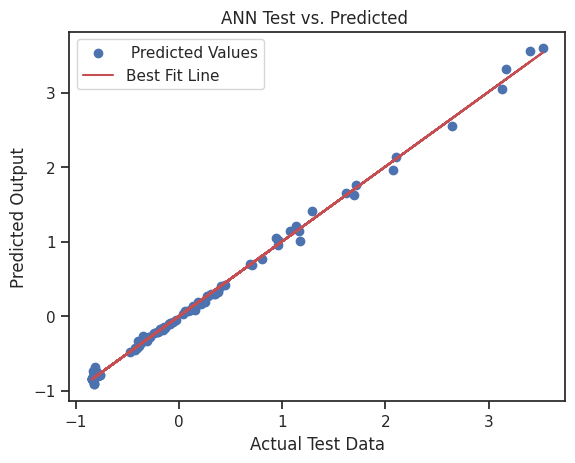

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

# assume model is the trained ANN and y_test is the actual test data
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# plot the predicted values against the actual test data
slope, intercept = np.polyfit(y_test, y_pred, 1)

# plot the predicted values against the actual test data
plt.scatter(y_test, y_pred, label=' Predicted Values')
plt.plot(y_test, slope*y_test + intercept, color='r',label='Best Fit Line')
plt.xlabel("Actual Test Data")
plt.ylabel("Predicted Output")
plt.title("ANN Test vs. Predicted ")
plt.legend()
plt.show()

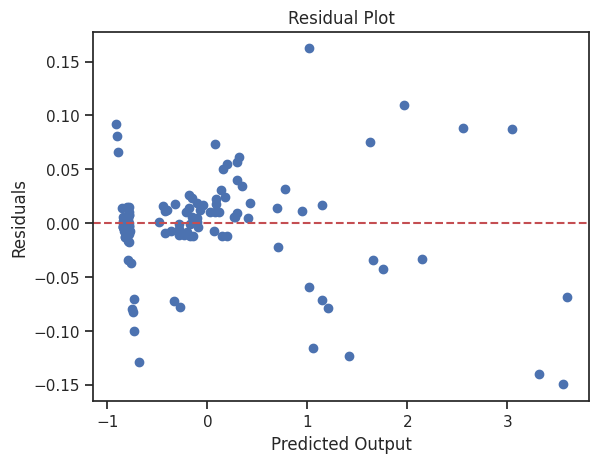

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

# assume model is the trained ANN and y_test is the actual test data
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate the residuals
residuals = y_test - y_pred

# Plotting the residual plot
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Output")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


In [ ]:
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Load and preprocess your data

# Define your MLP regressor model
model = make_pipeline(
    StandardScaler(),
    MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', alpha=0.01, random_state=42)
)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model on the training and test sets
train_loss = np.mean((model.predict(X_train) - y_train) ** 2)
test_loss = np.mean((model.predict(X_test) - y_test) ** 2)

print('Train Loss:', train_loss)
print('Test Loss:', test_loss)




Train Loss: 0.0032371462902276967
Test Loss: 0.002830562946279904


R2 Score: 0.9935561516215078


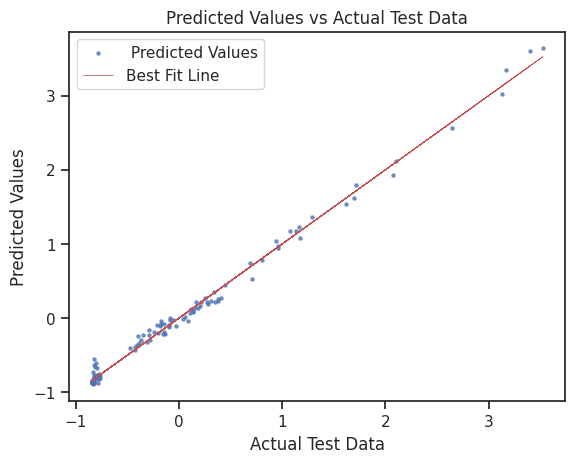

In [ ]:
y_pred = model.predict(X_test)

from sklearn.metrics import r2_score

# Calculate the R2 score
r2 = r2_score(y_test, y_pred)

print('R2 Score:', r2)

# plot the predicted values against the actual test data
slope, intercept = np.polyfit(y_test, y_pred, 1)

# Create duplicated or jittered data points
jittered_y_pred = y_pred + np.random.normal(0, 0.02, size=len(y_pred))

# Plot the actual test data against the predicted values with jittered data points
plt.scatter(y_test, jittered_y_pred, alpha=0.7, s=5, label=' Predicted Values')
plt.plot(y_test, y_test, color='r', linestyle='-', linewidth=0.5, label='Best Fit Line')
plt.xlabel('Actual Test Data')
plt.ylabel('Predicted Values')
plt.title('Predicted Values vs Actual Test Data')
plt.legend()
plt.show()



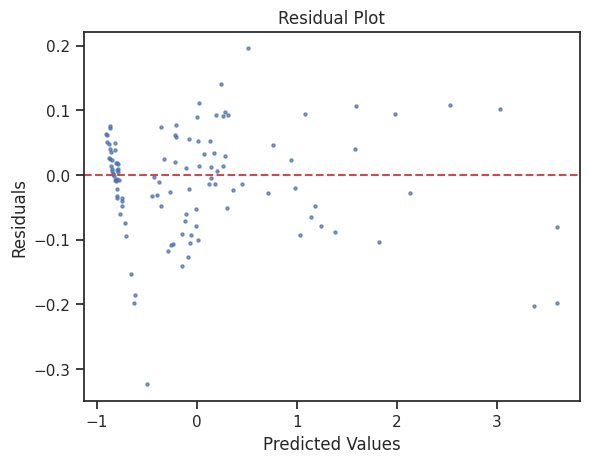

In [ ]:
# Calculate the residuals
residuals = y_test - y_pred
# Create duplicated or jittered data points
jittered_y_pred = y_pred + np.random.normal(0, 0.02, size=len(y_pred))
jittered_residuals = y_test - jittered_y_pred

# Create the residual plot with duplicated or jittered data points
plt.scatter(jittered_y_pred, jittered_residuals, alpha=0.7, s=5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

Epoch 1/100: Training Loss: 0.0018, Validation Loss: 0.0016
Epoch 2/100: Training Loss: 0.0018, Validation Loss: 0.0016
Epoch 3/100: Training Loss: 0.0018, Validation Loss: 0.0016
Epoch 4/100: Training Loss: 0.0018, Validation Loss: 0.0016
Epoch 5/100: Training Loss: 0.0018, Validation Loss: 0.0016
Epoch 6/100: Training Loss: 0.0018, Validation Loss: 0.0016
Epoch 7/100: Training Loss: 0.0018, Validation Loss: 0.0016
Epoch 8/100: Training Loss: 0.0018, Validation Loss: 0.0016
Epoch 9/100: Training Loss: 0.0018, Validation Loss: 0.0016
Epoch 10/100: Training Loss: 0.0018, Validation Loss: 0.0016
Epoch 11/100: Training Loss: 0.0018, Validation Loss: 0.0016
Epoch 12/100: Training Loss: 0.0018, Validation Loss: 0.0016
Epoch 13/100: Training Loss: 0.0018, Validation Loss: 0.0016
Epoch 14/100: Training Loss: 0.0018, Validation Loss: 0.0016
Epoch 15/100: Training Loss: 0.0018, Validation Loss: 0.0016
Epoch 16/100: Training Loss: 0.0018, Validation Loss: 0.0016
Epoch 17/100: Training Loss: 0.00

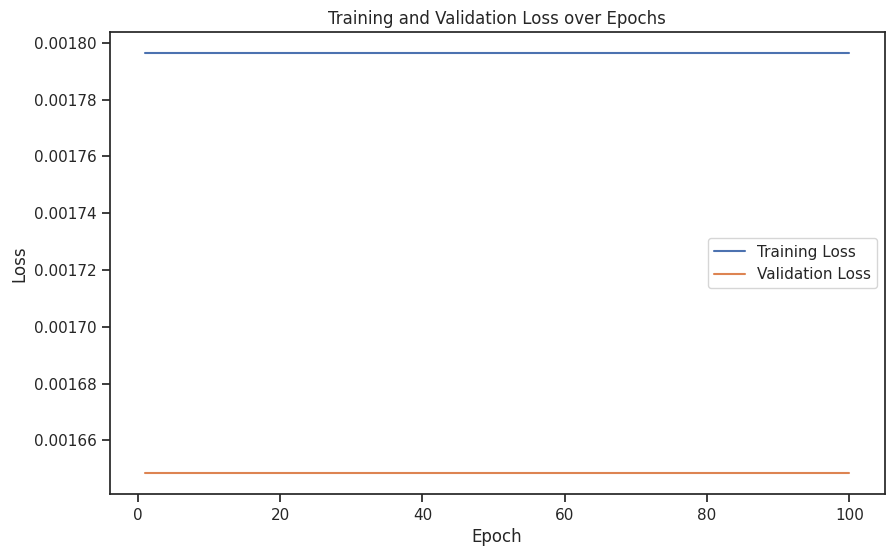

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Assuming you have your training data (X_train, y_train) and validation data (X_val, y_val)

# Create an MLPRegressor model
model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)

# Initialize lists to store training and validation losses for each epoch
train_losses = []
val_losses = []

# Train the model for multiple epochs
num_epochs = 100
for epoch in range(num_epochs):
    # Train the model
    model.fit(X_train, y_train)

    # Predict on training data and calculate training loss
    y_train_pred = model.predict(X_train)
    train_loss = mean_squared_error(y_train, y_train_pred)
    train_losses.append(train_loss)

    # Predict on validation data and calculate validation loss
    y_val_pred = model.predict(X_val)
    val_loss = mean_squared_error(y_val, y_val_pred)
    val_losses.append(val_loss)

    # Print the training and validation loss for each epoch
    print(f"Epoch {epoch+1}/{num_epochs}: Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

# Plot the training and validation losses
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()
